# Titanic data analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\TEJASHWINI\OneDrive\Desktop\Titanic_Analysis\train.csv")

### Metadata inspection

In [3]:
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.sample(10)

PassengerId  Survived  Pclass                                     Name  \
623          624         0       3              Hansen, Mr. Henry Damsgaard   
405          406         0       2                       Gale, Mr. Shadrach   
327          328         1       2                  Ball, Mrs. (Ada E Hall)   
159          160         0       3               Sage, Master. Thomas Henry   
651          652         1       2                      Doling, Miss. Elsie   
44            45         1       3            Devaney, Miss. Margaret Delia   
736          737         0       3  Ford, Mrs. Edward (Margaret Ann Watson)   
834          835         0       3                   Allum, Mr. Owen George   
636          637         0       3               Leinonen, Mr. Antti Gustaf   
29            30         0       3                      Todoroff, Mr. Lalio   

        Sex   Age  SibSp  Parch             Ticket     Fare Cabin Embarked  
623    male  21.0      0      0             350029   7.8542   NaN        S  
405    male  34.0      1      0              28664  21.0000   NaN        S  
327  female  36.0      0      0              28551  13.0000     D        S  
159    male   NaN      8      2           CA. 2343  69.5500   NaN        S  
651  female  18.0      0      1             231919  23.0000   NaN        S  
44   female  19.0      0      0             330958   7.8792   NaN        Q  
736  female  48.0      1      3         W./C. 6608  34.3750   NaN        S  
834    male  18.0      0      0               2223   8.3000   NaN        S  
636    male  32.0      0      0  STON/O 2. 3101292   7.9250   NaN        S  
29     male   NaN      0      0             349216   7.8958   NaN        S

In [6]:
df.describe(include='all')

PassengerId    Survived      Pclass                      Name   Sex  \
count    891.000000  891.000000  891.000000                       891   891   
unique          NaN         NaN         NaN                       891     2   
top             NaN         NaN         NaN  Jussila, Miss. Mari Aina  male   
freq            NaN         NaN         NaN                         1   577   
mean     446.000000    0.383838    2.308642                       NaN   NaN   
std      257.353842    0.486592    0.836071                       NaN   NaN   
min        1.000000    0.000000    1.000000                       NaN   NaN   
25%      223.500000    0.000000    2.000000                       NaN   NaN   
50%      446.000000    0.000000    3.000000                       NaN   NaN   
75%      668.500000    1.000000    3.000000                       NaN   NaN   
max      891.000000    1.000000    3.000000                       NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare        Cabin  \
count   714.000000  891.000000  891.000000       891  891.000000          204   
unique         NaN         NaN         NaN       681         NaN          147   
top            NaN         NaN         NaN  CA. 2343         NaN  C23 C25 C27   
freq           NaN         NaN         NaN         7         NaN            4   
mean     29.699118    0.523008    0.381594       NaN   32.204208          NaN   
std      14.526497    1.102743    0.806057       NaN   49.693429          NaN   
min       0.420000    0.000000    0.000000       NaN    0.000000          NaN   
25%      20.125000    0.000000    0.000000       NaN    7.910400          NaN   
50%      28.000000    0.000000    0.000000       NaN   14.454200          NaN   
75%      38.000000    1.000000    0.000000       NaN   31.000000          NaN   
max      80.000000    8.000000    6.000000       NaN  512.329200          NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#missing value treatment
median1=df['Age'].median()
median1

#to replace
df['Age'].replace(np.nan,median1,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
mode1=df['Embarked'].mode().values[0]
mode1

#to replace
df['Embarked'].replace(np.nan,mode1,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

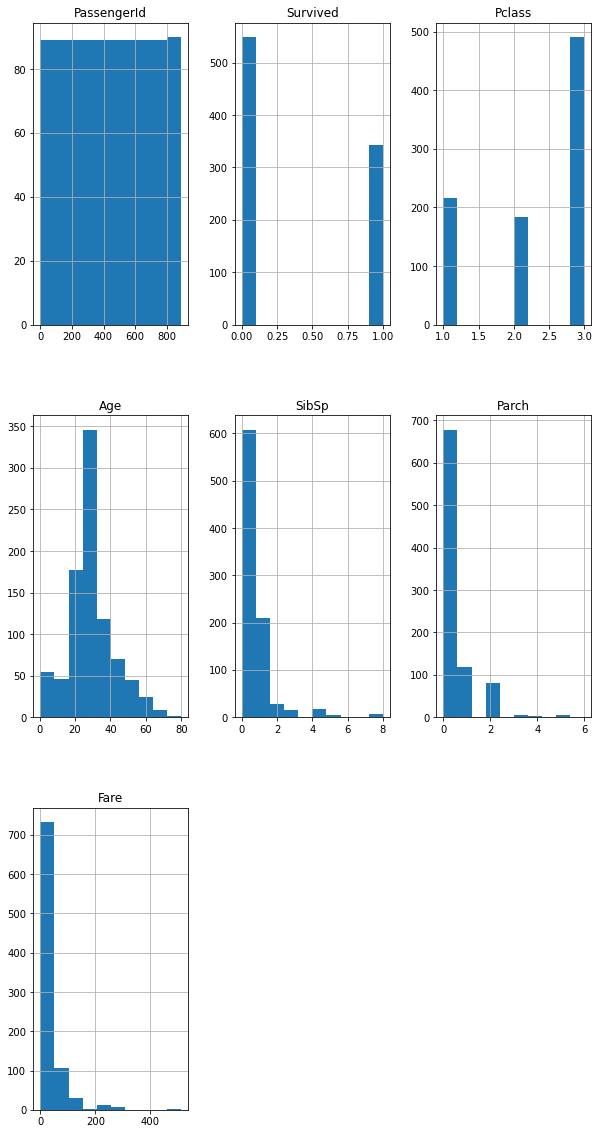

In [11]:
df.hist(figsize=(10,20))

In [12]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Remove not required columns 

In [13]:
df.drop(['Name','Ticket','Fare','Cabin','Age'],axis=1,inplace=True)

In [14]:
df.sample(10)

PassengerId  Survived  Pclass     Sex  SibSp  Parch Embarked
545          546         0       1    male      0      0        S
479          480         1       3  female      0      1        S
468          469         0       3    male      0      0        Q
624          625         0       3    male      0      0        S
352          353         0       3    male      1      1        C
418          419         0       2    male      0      0        S
290          291         1       1  female      0      0        S
810          811         0       3    male      0      0        S
52            53         1       1  female      1      0        C
808          809         0       2    male      0      0        S

### one hot Encoding

In [15]:
df=pd.get_dummies(df,columns=['Embarked'])

In [16]:
df.sample(10)

PassengerId  Survived  Pclass     Sex  SibSp  Parch  Embarked_C  \
50            51         0       3    male      4      1           0   
261          262         1       3    male      4      2           0   
41            42         0       2  female      1      0           0   
209          210         1       1    male      0      0           1   
231          232         0       3    male      0      0           0   
531          532         0       3    male      0      0           1   
686          687         0       3    male      4      1           0   
254          255         0       3  female      0      2           0   
154          155         0       3    male      0      0           0   
301          302         1       3    male      2      0           0   

     Embarked_Q  Embarked_S  
50            0           1  
261           0           1  
41            0           1  
209           0           0  
231           0           1  
531           0           0  
686           0           1  
254           0           1  
154           0           1  
301           1           0

In [17]:
df=pd.get_dummies(df,columns=['Sex'])

In [18]:
df.sample(10)

PassengerId  Survived  Pclass  SibSp  Parch  Embarked_C  Embarked_Q  \
618          619         1       2      2      1           0           0   
785          786         0       3      0      0           0           0   
598          599         0       3      0      0           1           0   
868          869         0       3      0      0           0           0   
395          396         0       3      0      0           0           0   
66            67         1       2      0      0           0           0   
214          215         0       3      1      0           0           1   
703          704         0       3      0      0           0           1   
548          549         0       3      1      1           0           0   
729          730         0       3      1      0           0           0   

     Embarked_S  Sex_female  Sex_male  
618           1           1         0  
785           1           0         1  
598           0           0         1  
868           1           0         1  
395           1           0         1  
66            1           1         0  
214           0           0         1  
703           0           0         1  
548           1           0         1  
729           1           1         0

In [19]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
Embarked_C     uint8
Embarked_Q     uint8
Embarked_S     uint8
Sex_female     uint8
Sex_male       uint8
dtype: object

In [20]:
df.Pclass=df.Pclass.replace({1:"America",2:"Europe",3:"Asia"})

In [21]:
df=pd.get_dummies(df,columns=['Pclass'])

### Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [23]:
#split the data for train and test
y=df['Survived']
x=df.drop(['Survived'],axis=1)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [25]:
model1=LogisticRegression()

In [26]:
model1.fit(x_train,y_train)

LogisticRegression()

In [27]:
model1.score(x_train,y_train)

0.811377245508982

In [28]:
model1.score(x_test,y_test)

0.7713004484304933

In [29]:
pred=model1.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7713004484304933

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       128
           1       0.77      0.66      0.71        95

    accuracy                           0.77       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[109,  19],
       [ 32,  63]], dtype=int64)

<AxesSubplot:>

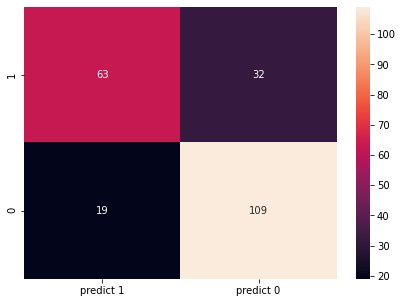

In [33]:
c=metrics.confusion_matrix(y_test,pred,labels=[1,0])

df_c=pd.DataFrame(c,index=[i for i in ["1","0"]],
                 columns = [i for i in ['predict 1','predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_c,annot=True,fmt='g')

### DECISION TREE CLASSIFIER

In [34]:
DecisionTreeClassifier?

Object `DecisionTreeClassifier` not found.


In [35]:
from sklearn.tree import DecisionTreeClassifier
modelD =DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=6,max_features=4,min_samples_leaf=0.2)
modelD.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=4,
                       min_samples_leaf=0.2, min_samples_split=6)

In [36]:
modelD.score(x_train,y_train)

0.7874251497005988

In [37]:
modelD.score(x_test,y_test)

0.7847533632286996

### Bagging Classifier(ensemble)

In [38]:
BaggingClassifier?

Object `BaggingClassifier` not found.


In [57]:
from sklearn.ensemble import BaggingClassifier
modelB =BaggingClassifier(n_estimators=25,base_estimator=modelD)
modelB.fit(x_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3,
                                                        max_features=4,
                                                        min_samples_leaf=0.2,
                                                        min_samples_split=6),
                  n_estimators=25)

In [58]:
modelB.score(x_train,y_train)

0.7874251497005988

In [59]:
modelB.score(x_test,y_test)

0.7847533632286996

### Ada Boost Classifier

In [60]:
AdaBoostClassifier?

In [67]:
from sklearn.ensemble import AdaBoostClassifier
modelA =AdaBoostClassifier(n_estimators=70,base_estimator=modelB)
modelA.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                          max_depth=3,
                                                                                          max_features=4,
                                                                                          min_samples_leaf=0.2,
                                                                                          min_samples_split=6),
                                                    n_estimators=25),
                   n_estimators=70)

In [68]:
modelA.score(x_train,y_train)

0.7949101796407185

In [69]:
modelA.score(x_test,y_test)

0.7847533632286996

### Gradient Boosting

In [70]:
GradientBoostingClassifier?

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
modelG =GradientBoostingClassifier(n_estimators=140,subsample=0.1,min_samples_leaf=16,max_depth=10)
modelG.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=16, n_estimators=140,
                           subsample=0.1)

In [175]:
modelG.score(x_train,y_train)

0.8233532934131736

In [176]:
modelG.score(x_test,y_test)

0.7802690582959642

### Random Forest classifier

In [179]:
RandomForestClassifier?

In [ ]:
#max_features//to limit the number of coloumns

In [201]:
from sklearn.ensemble import RandomForestClassifier
modelR =RandomForestClassifier(n_estimators=200,max_features=7,min_samples_split=20,min_samples_leaf=23)
modelR.fit(x_train,y_train)

RandomForestClassifier(max_features=7, min_samples_leaf=23,
                       min_samples_split=20, n_estimators=200)

In [202]:
modelR.score(x_train,y_train)

0.8218562874251497

In [203]:
modelR.score(x_test,y_test)

0.7802690582959642

### Support vector machine

In [204]:
SVC?

In [52]:
from sklearn.svm import SVC

In [246]:
modelsv=SVC(kernel='linear')

In [247]:
modelsv.fit(x_train,y_train)

SVC(kernel='linear')

In [248]:
modelsv.score(x_train,y_train)

0.7874251497005988

In [249]:
modelsv.score(x_test,y_test)

0.7847533632286996